In [5]:
#import library
from tensorflow import keras
import tensorflow as tf 
#style penulisan keras : https://keras.io/examples/vision/mnist_convnet/
width=224
height=224
depth=3
inputShape = (height, width, depth)
model = keras.Sequential(
    [
        keras.Input(shape=inputShape),
        tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(7, activation="softmax"),
    ]
)

model.summary()

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 128)      

In [6]:
from keras.preprocessing.image import ImageDataGenerator
#prameter augmentasi : https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
                                   
training_set = train_datagen.flow_from_directory('C:/Users/Alfaria/SKRIPSI/hasil_augmen/training/BurungPemakanPadi',target_size = (224, 224),class_mode="categorical")
test_set = test_datagen.flow_from_directory('C:/Users/Alfaria/SKRIPSI/hasil_augmen/testing/BurungPemakanPadi',target_size = (224, 224),class_mode="categorical")

Found 5600 images belonging to 7 classes.
Found 1400 images belonging to 7 classes.


In [7]:
#cek nama class
def switch_dict_key_values(this_dict):
    return dict((v,k)for k,v in this_dict.items())

training_set_names=switch_dict_key_values(training_set.class_indices)
print(training_set_names)

{0: 'BondolCoklat', 1: 'BondolHaji', 2: 'BondolJawa', 3: 'BondolPeking', 4: 'GelatikJawa', 5: 'Gereja', 6: 'Manyar'}


In [8]:
# proses fitting / training 
epoch = 50
history = model.fit_generator(training_set,
epochs = epoch,
validation_data = test_set
)

C:\Users\Alfaria\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
175/175 [==============================] - 713s 4s/step - loss: 1.2565 - accuracy: 0.5200 - val_loss: 0.4465 - val_accuracy: 0.8564
Epoch 2/50
175/175 [==============================] - 685s 4s/step - loss: 0.3305 - accuracy: 0.8909 - val_loss: 0.2360 - val_accuracy: 0.9257
Epoch 3/50
175/175 [==============================] - 722s 4s/step - loss: 0.1423 - accuracy: 0.9570 - val_loss: 0.1052 - val_accuracy: 0.9636
Epoch 4/50
175/175 [==============================] - 709s 4s/step - loss: 0.0821 - accuracy: 0.9734 - val_loss: 0.0502 - val_accuracy: 0.9850
Epoch 5/50
175/175 [==============================] - 675s 4s/step - loss: 0.0829 - accuracy: 0.9752 - val_loss: 0.0425 - val_accuracy: 0.9879
Epoch 6/50
175/175 [==============================] - 673s 4s/step - loss: 0.0792 - accuracy: 0.9759 - val_loss: 0.0511 - val_accuracy: 0.9829
Epoch 7/50
175/175 [==============================] - 669s 4s/step - loss: 0.0359 - accuracy: 0.9893 - val_loss: 0.0369 - val_accuracy: 0.9864

In [9]:
#menyimpan model
model.save_weights("model2keedua.h5")

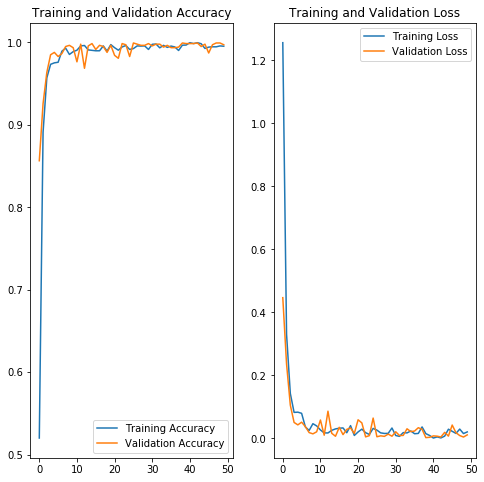

In [10]:
#ploting hasil acc dan loss
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epoch)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()